# What Actually Drives Muscle Gain & Fat Loss?

I want to answer a question: __"Which factors matter most for muscle gain and fat loss: training volume, protein intake, calories, sleep, or testosterone-related variables?"__. Using my developped data scientist's skills, I am going to find an answer to this question with this project.

## Step #1: Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

## Step #2: Get Data

`Final_data.csv` file contains 20 000 records of people's lifestyle. Using it, I will train a model to predict body fat % based on features like: age, height, weight, water intake, etc.

In [2]:
data = pd.read_csv("Final_data.csv")
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


## Step #3: Inspect Data

In [3]:
data.shape

(20000, 54)

This dataset contains 54 columns, around half of them aren't needed for the model, the dataset combines measurments of individuals and description of exercise. Description of exercise will not help us to get the answer so I will select only important features.

In [4]:
data.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets',
       'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'],
      dtype='object')

In [5]:
data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04
mean,38.851453,73.898832,1.723093,179.889702,143.704306,62.195813,1.259446,1280.109600,26.101313,2.627485,...,24.921651,1998.297076,0.499983,1.460142,0.699005,0.802305,744.308699,53.786384,866.352318,8.631802e+19
std,12.114580,21.173010,0.127033,11.510805,14.267688,7.289351,0.341336,502.228982,4.996160,0.604724,...,6.701144,440.848408,0.001455,0.518946,0.144880,0.096613,720.946619,12.498740,250.317069,3.197579e+19
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.110000,11.333134,1.460000,...,12.037907,1105.570000,0.492434,0.516706,0.371344,0.599789,-1266.220000,30.946261,219.852800,2.491905e+16
25%,28.170000,58.160000,1.620000,170.057500,131.220000,55.960000,1.050000,910.800000,22.387807,2.170000,...,20.094975,1661.022500,0.499054,1.076294,0.583656,0.727676,261.432500,44.587037,714.098250,6.441978e+19
50%,39.865000,70.000000,1.710000,180.140000,142.990000,62.200000,1.270000,1231.450000,25.822504,2.610000,...,24.119097,1943.130000,0.499981,1.382260,0.686284,0.794834,691.190000,51.204908,868.721400,8.371578e+19
75%,49.630000,86.100000,1.800000,189.425000,156.060000,68.090000,1.460000,1553.112500,29.676026,3.120000,...,28.562620,2271.950000,0.500910,1.750495,0.798196,0.869211,1176.290000,61.939016,1012.532700,1.100442e+20
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.820000,35.000000,3.730000,...,50.229544,3699.540000,0.507889,3.916881,1.073939,1.047032,3075.580000,90.117371,1477.108800,1.756614e+20


In [6]:
data_selected_features = data[['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise']]

data_selected_features.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Daily meals frequency,Physical exercise
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,38.851453,73.898832,1.723093,179.889702,143.704306,62.195813,1.259446,1280.109600,26.101313,2.627485,3.318629,1.809176,24.921680,2.864804,0.452503
std,12.114580,21.173010,0.127033,11.510805,14.267688,7.289351,0.341336,502.228982,4.996160,0.604724,0.911198,0.736204,6.701126,0.636649,0.986628
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.110000,11.333134,1.460000,1.940000,1.000000,12.040000,1.950000,-0.070000
25%,28.170000,58.160000,1.620000,170.057500,131.220000,55.960000,1.050000,910.800000,22.387807,2.170000,2.980000,1.010000,20.097500,2.020000,-0.010000
50%,39.865000,70.000000,1.710000,180.140000,142.990000,62.200000,1.270000,1231.450000,25.822504,2.610000,3.010000,1.990000,24.120000,3.000000,0.010000
75%,49.630000,86.100000,1.800000,189.425000,156.060000,68.090000,1.460000,1553.112500,29.676026,3.120000,4.000000,2.020000,28.560000,3.010000,0.040000
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.820000,35.000000,3.730000,5.060000,3.050000,50.230000,4.040000,4.050000


Data is normal, I don't see any weird numbers in features. Let's inspect Physical exercise feature to see what it shows

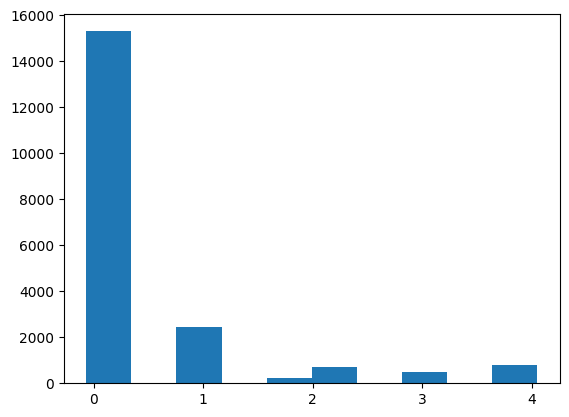

In [7]:
plt.hist(data_selected_features['Physical exercise'])
plt.show()

In [8]:
data_selected_features['Physical exercise'].value_counts()

,count
Physical exercise,
0.00,3167
-0.01,2767
0.01,2704
-0.02,1795
0.02,1792
...,...
1.07,2
2.06,2
2.94,1


Description on Kaggle says: __"Indicates the type or frequency of physical activity."__. It seems like this feature is useless, it shows 0 for Physical exercise but Workout Frequency is high, Session Duration is high too, we can simply drop this feature.

In [9]:
data_selected_features[data_selected_features['Physical exercise'] == 0.0].head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Daily meals frequency,Physical exercise
7,55.92,Female,84.07,1.63,183.87,141.12,51.79,1.01,727.81,Yoga,32.088176,2.88,3.97,2.01,31.64,2.99,0.0
24,50.53,Male,57.01,1.91,184.12,131.58,68.07,1.09,1177.20,Strength,22.392596,2.72,3.99,2.00,15.63,2.01,-0.0
25,54.03,Female,87.22,1.76,188.72,157.91,68.00,1.48,1067.38,Yoga,28.418499,3.39,3.00,2.02,28.16,3.00,-0.0
30,57.07,Female,76.90,1.86,173.05,140.94,55.07,1.15,827.31,Yoga,29.439411,2.80,3.99,1.99,22.23,1.98,-0.0
49,32.59,Male,52.75,1.66,190.86,128.92,71.91,1.26,1248.53,Strength,23.565569,2.49,2.96,1.01,19.14,3.01,0.0
55,39.14,Female,71.32,1.88,197.84,146.63,50.97,0.55,665.50,HIIT,23.967493,2.21,1.99,1.00,20.18,3.00,-0.0
61,58.04,Female,109.54,1.91,197.50,156.16,55.87,1.48,1065.60,Yoga,30.729714,2.22,3.02,2.00,30.03,3.01,-0.0
62,56.29,Female,125.88,1.86,196.94,129.10,63.86,1.00,960.80,Cardio,35.000000,2.20,3.04,2.01,36.39,2.99,0.0
65,33.93,Female,64.38,1.78,169.13,144.15,63.97,1.33,1438.79,Strength,22.680754,1.79,4.02,2.02,20.32,2.98,0.0
73,18.00,Female,62.43,1.59,190.02,161.38,50.38,1.23,1180.80,Cardio,26.635812,2.18,4.01,2.00,24.69,3.01,-0.0


In [10]:
# drop Physical exercise feature
data_selected_features = data_selected_features.drop('Physical exercise', axis=1)

In [11]:
# Check for missing values
data_selected_features.isna().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


In [12]:
# check fro duplicates
data_selected_features.duplicated().sum()

np.int64(0)

## Step #4: Analysing through Visualisation

### Heatmap

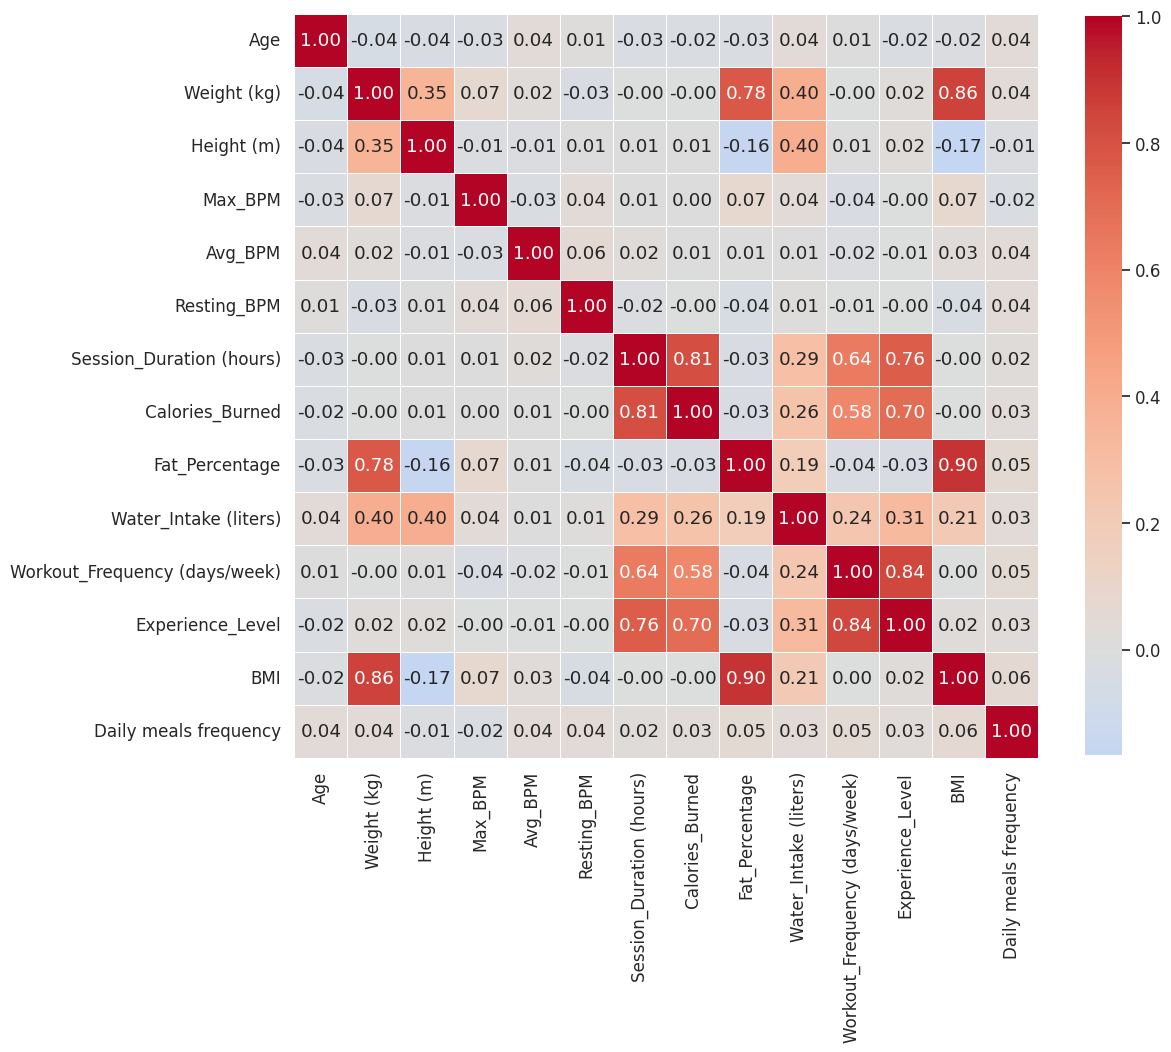

In [13]:
sns.set_theme(
    style="whitegrid",
    context="notebook",   # paper | notebook | talk | poster
    font_scale=1.1
)

# using describe here because we have 1 categorical feature
correlation = data_selected_features[data_selected_features.describe().columns].corr()

plt.figure(figsize=(12,12))

sns.heatmap(
    correlation,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    center=0, # 0 is neutral
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.show()

We can see that our target feature (`Fat_Percentage`) has strong correlation with 2 features: `Weight` and `BMI`

### Features with highest correlation

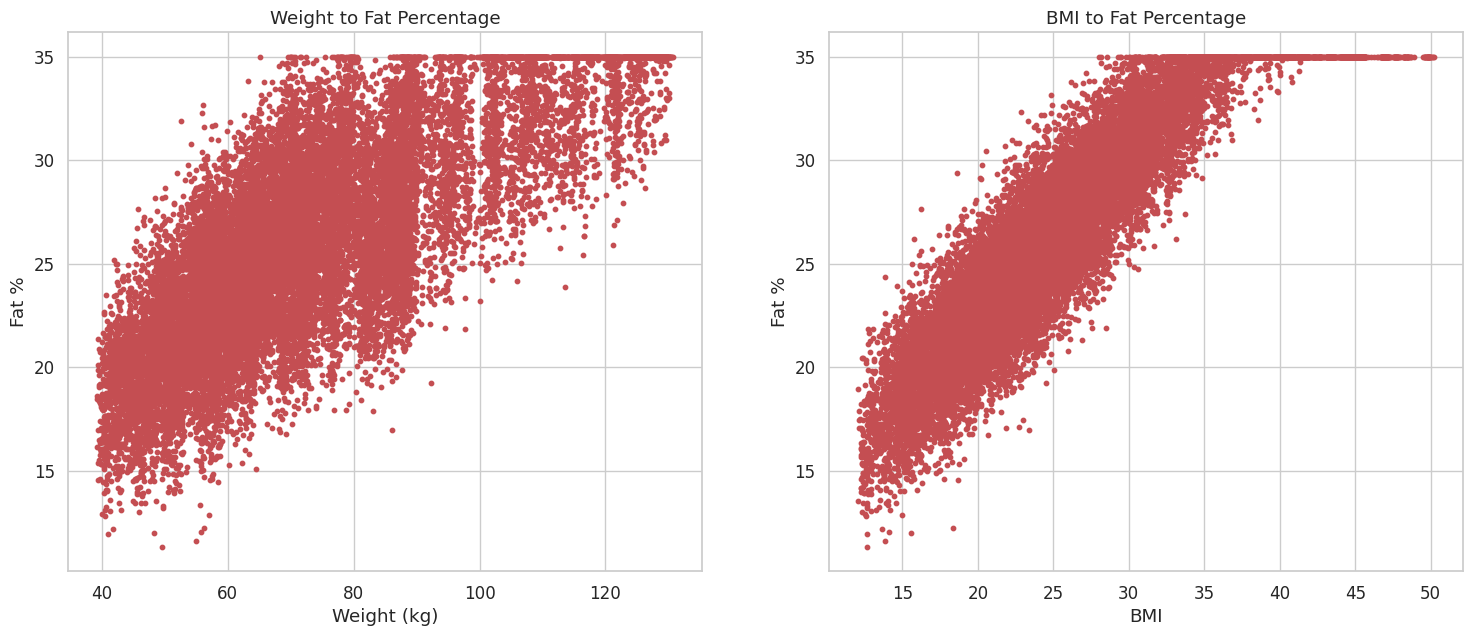

In [14]:
def plot_weight_bmi_to_fat(data: pd.DataFrame, size: float=20.0, with_predicted: bool=False):
  """
  Shows 2 scatter plots.
  First plot: Weight (kg) to Fat Percentage
  Second plot: BMI to Fat Percentage
  Parameters:
    data (pd.DataFrame): actual data; to plot with predictions, Prediction column should be added
    size (float): default 20.0; size of the points on the plots
    with_predicted (bool): default False, True is Predicted column is included
  """
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

  # Weight to Fat
  ax[0].scatter(data['Weight (kg)'], data['Fat_Percentage'], s=size, c='r')
  if with_predicted:
    ax[0].scatter(data['Weight (kg)'], data['Predicted'], s=size, c='b', label='Pred')

  ax[0].set_title('Weight to Fat Percentage')
  ax[0].set_xlabel('Weight (kg)')
  ax[0].set_ylabel('Fat %')

  # Weight to Fat
  ax[1].scatter(data['BMI'], data['Fat_Percentage'], s=size, c='r')
  if with_predicted:
    ax[1].scatter(data['BMI'], data['Predicted'], s=size, c='b', label='Pred')

  ax[1].set_title('BMI to Fat Percentage')
  ax[1].set_xlabel('BMI')
  ax[1].set_ylabel('Fat %')
  plt.show()

plot_weight_bmi_to_fat(data_selected_features, size=10)

Clear positive correlation for these features.


### Pairplots

Let's build some pairplots.
I will implement custom functions for this.

In [15]:
def get_pairs(data: pd.DataFrame, target_col: str) -> list:
  """
  Creates a lsit of unique pairs: [col_1, col_2] of all features
  where col_1 is the target feature and col_2 one of the independent features
  Parameters:
    data (pd.DataFrame): actual data
    target_col (str): dependent feature to make predictions on
  Returns:
    list: a list that contains unique pairs
  """
  pairs = [] # pairs will be stored here
  for feature in list(data.describe().columns): # using describe() to get only numerical columns
    if feature == target_col: # if feature is target, skip it
      continue
    pairs.append([target_col, feature]) # add pair to the output list
  return pairs

def get_independent_features(data: pd.DataFrame, target_col: str) -> list:
  """
  Creates a list of all numerical features in the dataset excluding target feature
  Parameters:
    data (pd.DataFrame): actual data
    target_col (str): dependent feature to make predictions on
  Returns:
    list: all independent numerical features
  """
  return [feature for feature in data.describe().columns if feature != target_col]

def draw_scatter_pairplot(N: int, nrows: int, ax: plt.subplots, pairs: list, data: pd.DataFrame, colour: str):
  """
  Draws a sublot with scatter plots with total of N plots.
  Each row contains 2 plots
  Parameters:
    N (int): len(pairs)
    nrows (int): number of rows to be drown for the subplot
    ax (plt.ax): an actual instance of plt.ax declared before
    pairs (list): list of pairs to be drawn
    data (pd.DataFrame): actual data for plotting
    colour (str): colour of the point on the plots
  """
  ax_idx = 0 # init to 0 as it is the first row in our subplot

  for idx in range(0, N, 2): # from 0 to len(pairs) with step 2

    if idx == N - 1: # if current idx is equal to N-1 (length - 1), then it's the last element in the pairs
                     # and has to be drawn on the last row of the subplot
                     # this code is implemented in case if number of pairs is odd

      last_plot = ax[nrows-1][0]; last_pair = pairs[idx] # declaring last_plot and last_pair insstances for clarity
      last_plot.scatter(data[last_pair[0]], data[last_pair[1]], c=colour) # drawing the plot
      last_plot.set_xlabel(last_pair[0]); last_plot.set_ylabel(last_pair[1]) # setting x and y labels
      break # breaking the loop because it's the last pair

    first_plot, second_plot = ax[ax_idx][0], ax[ax_idx][1]
    first_pair, second_pair = pairs[idx], pairs[idx+1]

    first_plot.scatter(data[first_pair[0]], data[first_pair[1]], c=colour)
    first_plot.set_xlabel(first_pair[0]); first_plot.set_ylabel(first_pair[1])

    second_plot.scatter(data[second_pair[0]], data[second_pair[1]], c=colour)
    second_plot.set_xlabel(second_pair[0]); second_plot.set_ylabel(second_pair[1])

    ax_idx += 1 # update index to draw plot on the next row of a subplot

def draw_hist_pairplot(N: int, nrows: int, ax: plt.subplots, features: list, data: pd.DataFrame, colour: str):
  """
  Draws a sublot with hist plots with total of N plots.
  Each row contains 2 plots
  Parameters:
    N (int): len(pairs)
    nrows (int): number of rows to be drown for the subplot
    ax (plt.ax): an actual instance of plt.ax declared before
    features (list): list of features to be drawn
    data (pd.DataFrame): actual data for plotting
    colour (str): colour of the point on the plots
  """
  ax_idx = 0 # init to 0 as it is the first row in our subplot

  for idx in range(0, N, 2): # from 0 to len(pairs) with step 2

    if idx == N - 1:
      last_plot = ax[nrows-1][0]; last_pair = features[idx]
      last_plot.hist(data[last_pair], color=colour)
      last_plot.set_xlabel(last_pair)
      break

    first_plot, second_plot = ax[ax_idx][0], ax[ax_idx][1]
    first_pair, second_pair = features[idx], features[idx+1]

    first_plot.hist(data[first_pair], color=colour)
    first_plot.set_xlabel(first_pair)

    second_plot.hist(data[second_pair], color=colour)
    second_plot.set_xlabel(second_pair)
    ax_idx += 1 # update index to draw plot on the next row of a subplot

def draw_boxplot_pairplot(N: int, nrows: int, ax: plt.subplots, features: list, data: pd.DataFrame):
  """
  Draws a sublot with hist plots with total of N plots.
  Each row contains 2 plots
  Parameters:
    N (int): len(pairs)
    nrows (int): number of rows to be drown for the subplot
    ax (plt.ax): an actual instance of plt.ax declared before
    features (list): list of features to be drawn
    data (pd.DataFrame): actual data for plotting
  """
  ax_idx = 0 # init to 0 as it is the first row in our subplot

  for idx in range(0, N, 2): # from 0 to len(pairs) with step 2

    if idx == N - 1:
      last_plot = ax[nrows-1][0]; last_pair = features[idx]
      last_plot.boxplot(data[last_pair])
      last_plot.set_xlabel(last_pair)
      break

    first_plot, second_plot = ax[ax_idx][0], ax[ax_idx][1]
    first_pair, second_pair = features[idx], features[idx+1]

    first_plot.boxplot(data[first_pair])
    first_plot.set_xlabel(first_pair)

    second_plot.boxplot(data[second_pair])
    second_plot.set_xlabel(second_pair)
    ax_idx += 1 # update index to draw plot on the next row of a subplot

def plot_pairplot(data, target_col, plot_type: str='scatter', colour: str='red'):

  map_pairs = { # depending on type provided calls a needed function for pairs
      'hist': get_independent_features,
      'boxplot': get_independent_features,
      'scatter': get_pairs
  }

  map_draw_funcs = { # depending on type provided draws pairplot with provided type
      'hist': draw_hist_pairplot,
      'boxplot': draw_boxplot_pairplot,
      'scatter': draw_scatter_pairplot
  }

  try: # to prevent default KeyError
    features = map_pairs[plot_type](data, target_col) # getting list of features to be displayed
    draw_subplot = map_draw_funcs[plot_type] # deciding what function will be used to draw
  except KeyError:
    raise KeyError('Please provide a supported plot_type')

  N = len(features) # number of pairs
  nrows = (N // 2) if N % 2 == 0 else (N // 2) + 1 # if even then leave as it is, if odd, add 1 to draw the last plot
  ncols = 2 # always 2 for this function

  fig, ax = plt.subplots(
      nrows=nrows,
      ncols=ncols,
      figsize=(12, 15),
      )
  fig.tight_layout(h_pad=2.0, w_pad=3.5) # setting gaps between subplots

  draw_subplot(N, nrows, ax, features, data, colour) if plot_type != 'boxplot' else draw_subplot(N, nrows, ax, features, data)
  plt.show()

__Scatter pairplot:__

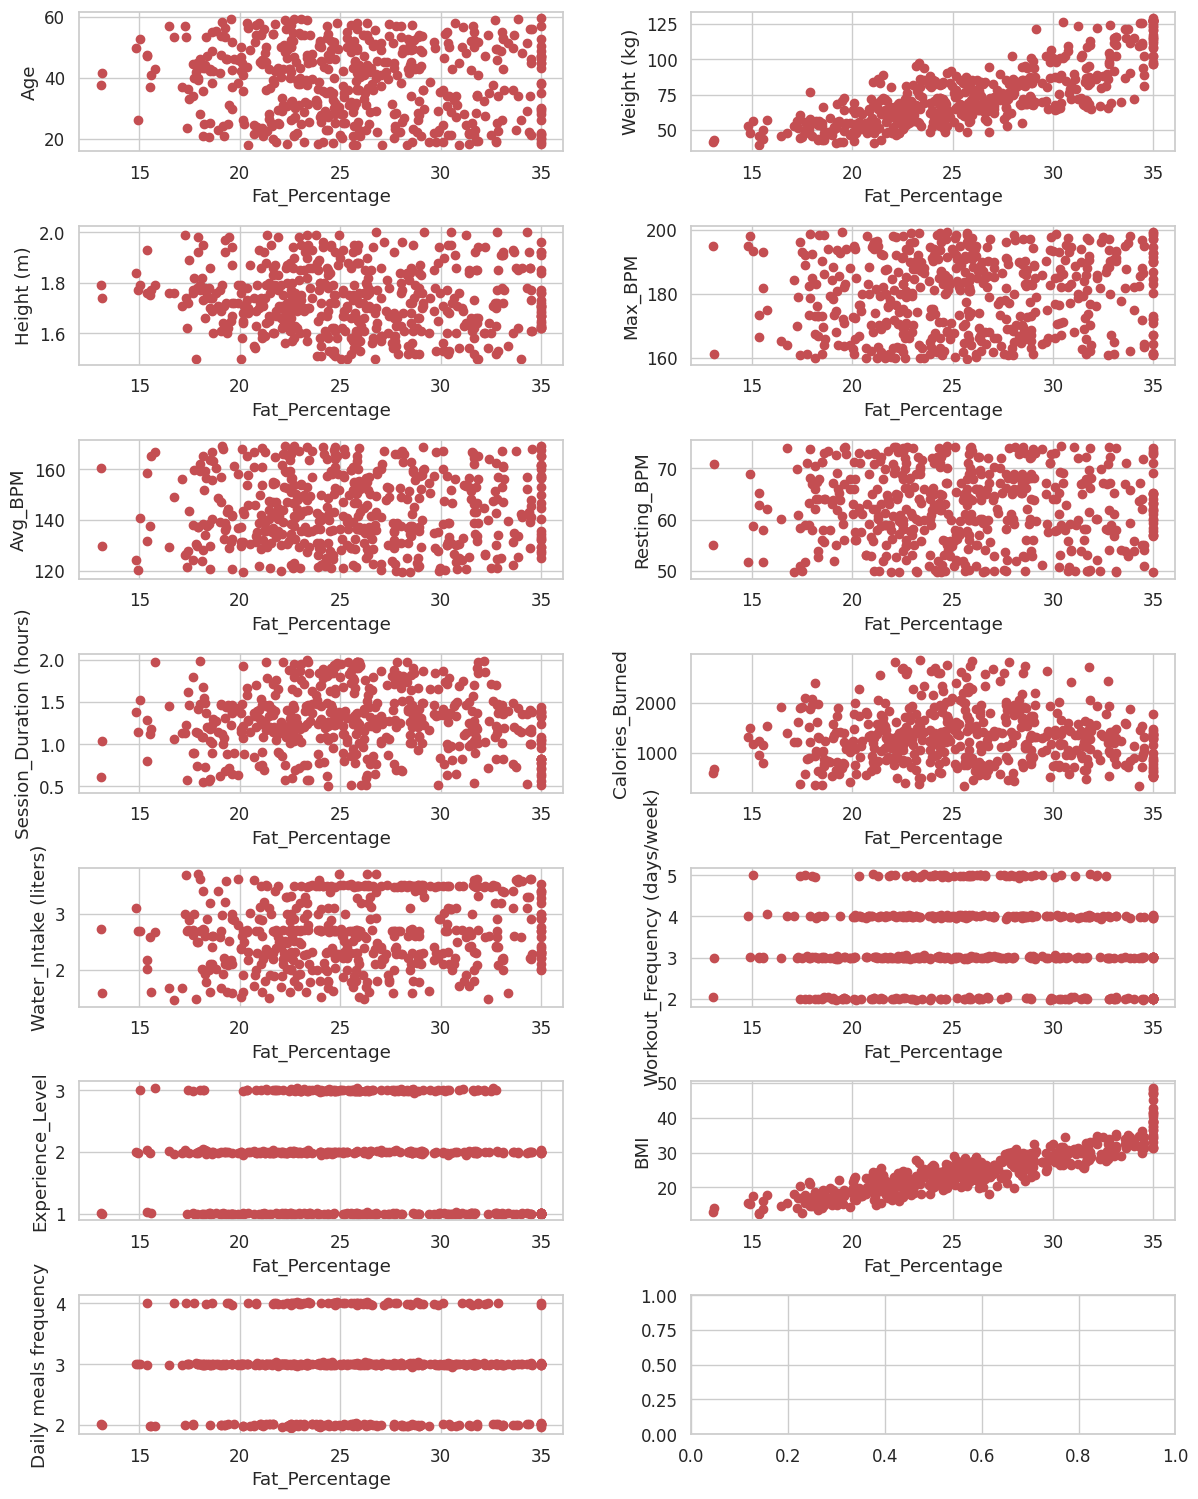

In [16]:
plot_pairplot(data_selected_features.sample(500), target_col='Fat_Percentage', colour='r')

As we can see, only 2 features show relationship to our target feature as was described before. Other features do not show strong relationship.

__Hist pairplot:__

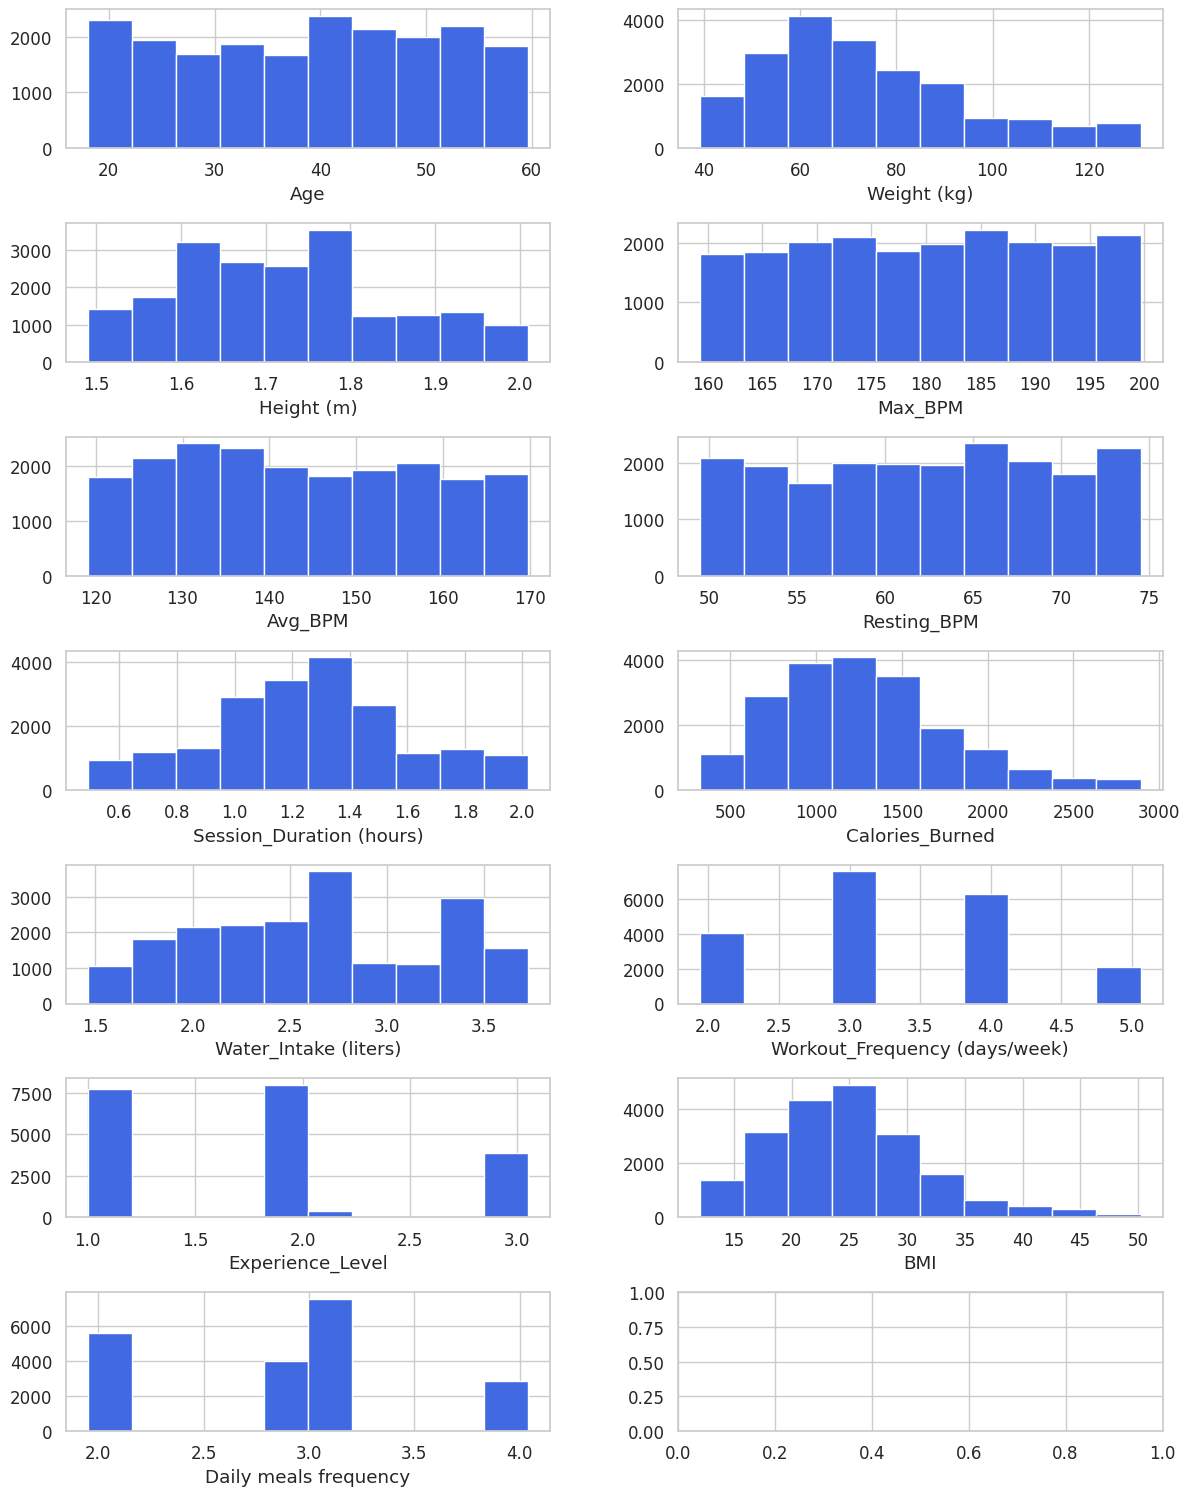

In [17]:
plot_pairplot(data_selected_features, 'Fat_Percentage', plot_type='hist', colour='royalblue')

Every feature is normally distributed, no changes needed

__Boxplot pairplot:__

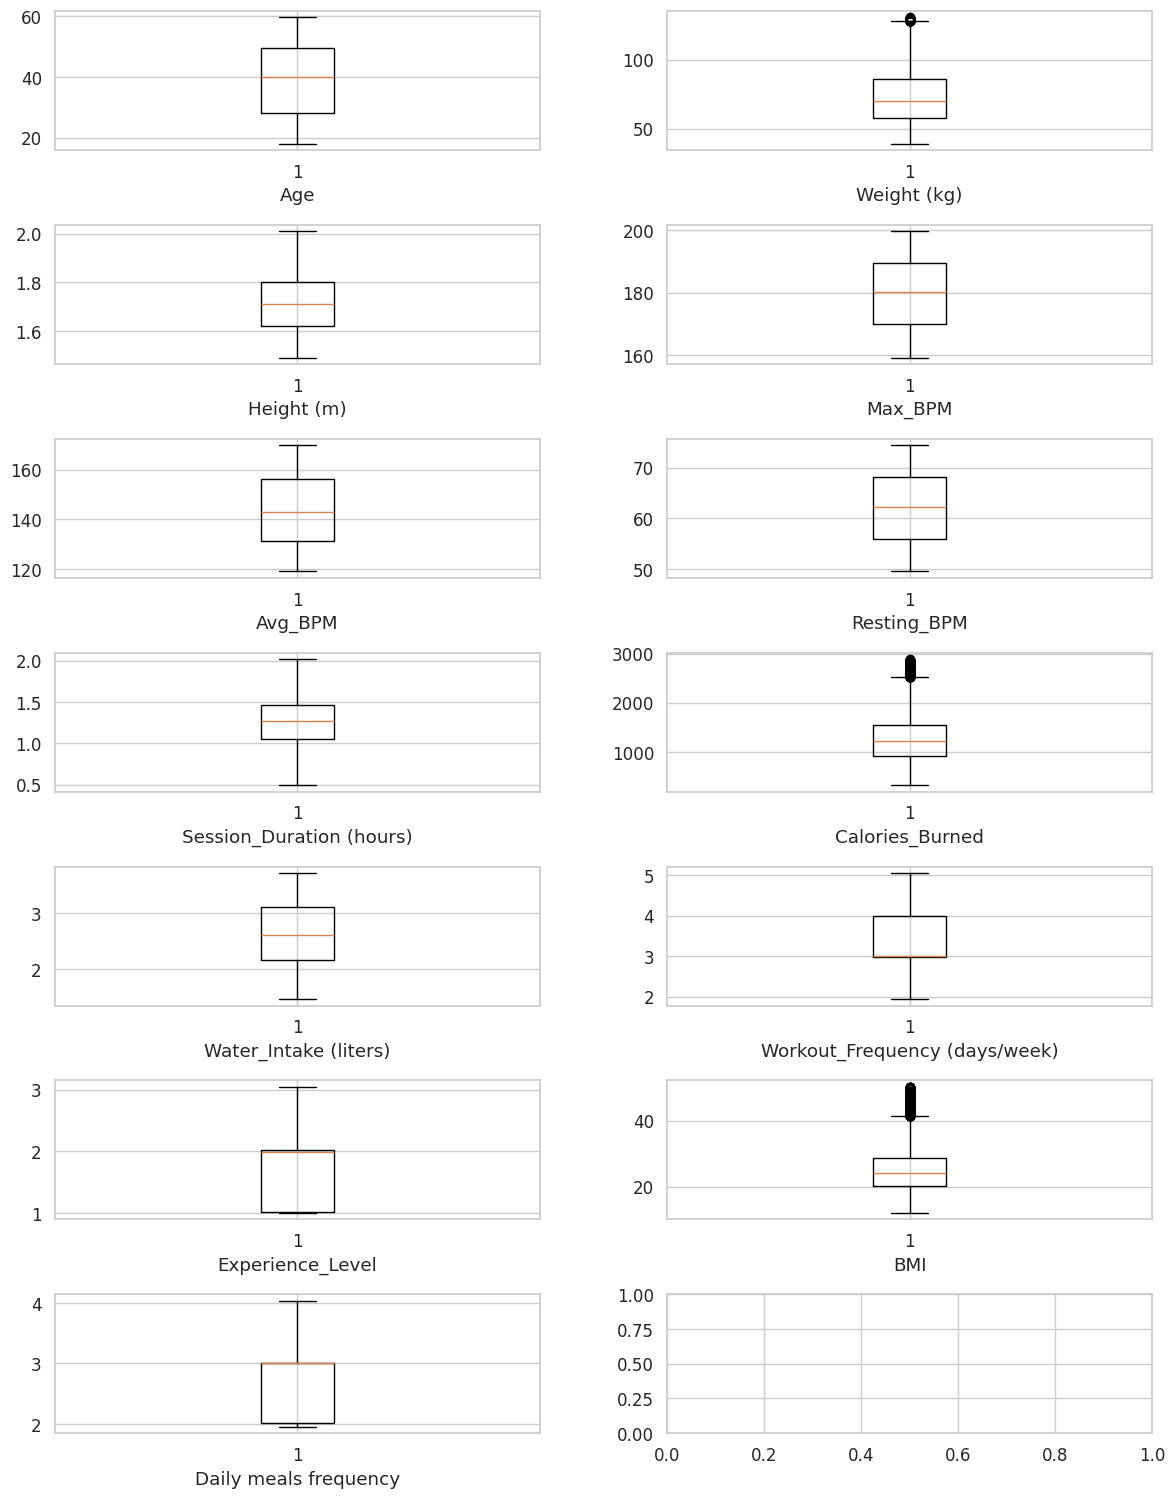

In [18]:
plot_pairplot(data_selected_features, 'Fat_Percentage', plot_type='boxplot', colour='royalblue')

I can see that 3 features contain outliers. They might negatively affect our future model training. These features are: `Weight`, `Calories_Burned`, `BMI`.  

## Step #4 t-test

Inspecting features' importance with t-test and p-values

In [19]:
import statsmodels.api as sm

# Select features & target
X = data_selected_features[data_selected_features.describe().columns]

y = data_selected_features["Fat_Percentage"]

# Add intercept
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Summary table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Fat_Percentage   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.433e+31
Date:                Tue, 06 Jan 2026   Prob (F-statistic):               0.00
Time:                        11:15:49   Log-Likelihood:             5.8421e+05
No. Observations:               20000   AIC:                        -1.168e+06
Df Residuals:                   19985   BIC:                        -1.168e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [20]:
importance_df = (
    model.summary2().tables[1]
    .rename(columns={"Coef.": "coefficient"})
    [["coefficient", "P>|t|"]]
    .sort_values("P>|t|")
)

importance_df['Statistically Significant?'] = importance_df.apply(func=lambda x: x['P>|t|'] < 0.05, axis=1)
importance_df

,coefficient,P>|t|,Statistically Significant?
Fat_Percentage,1.000000e+00,0.000000e+00,True
Calories_Burned,-8.131516e-17,0.000000e+00,True
Max_BPM,4.514618e-16,4.272949e-48,True
Age,-3.217912e-16,9.020892e-28,True
Weight (kg),7.216450e-16,5.113445e-07,True
Daily meals frequency,-1.713907e-15,2.130410e-03,True
Resting_BPM,1.433315e-16,3.234991e-03,True
BMI,-1.054712e-15,1.324289e-02,True
Workout_Frequency (days/week),1.637579e-15,2.113739e-02,True
Water_Intake (liters),1.484923e-15,3.974234e-02,True


From the table above we can see what features will be important for the future model, if p-value is less than 0.05 we can simply discard those features.

In the previous step I found out that features: `Weight`, `Calories_Burned`, `Workout_Frequency` contain outliers but they are statistically important, so in the next step I will inspect them carefully.

## Step #5 Feature Selection & Engineering


### Feature Selection & Encoding

Selecting features that were important through t-test + categoriral features

In [21]:
important_features = list(importance_df[importance_df['Statistically Significant?'] == True].index) + ['Gender', 'Workout_Type']
data_important_features = data[important_features]
data_important_features.head()

,Fat_Percentage,Calories_Burned,Max_BPM,Age,Weight (kg),Daily meals frequency,Resting_BPM,BMI,Workout_Frequency (days/week),Water_Intake (liters),Session_Duration (hours),Gender,Workout_Type
0,26.800377,1080.90,188.58,34.91,65.27,2.99,69.05,24.87,3.99,1.50,1.00,Male,Strength
1,27.655021,1809.91,179.43,23.37,56.41,3.01,73.18,23.48,4.00,1.90,1.37,Female,HIIT
2,24.320821,802.26,175.04,33.20,58.98,1.99,54.96,21.15,2.99,1.88,0.91,Female,Cardio
3,32.813572,1450.79,191.21,38.69,93.78,3.00,50.07,32.45,3.99,2.50,1.10,Female,HIIT
4,17.307319,1166.40,193.58,45.09,52.42,3.00,70.84,14.83,4.00,2.91,1.08,Male,Strength


Converting categorical features into binary format

In [22]:
data_important_features = pd.get_dummies(data_important_features, dtype='float64')
data_important_features.head()

,Fat_Percentage,Calories_Burned,Max_BPM,Age,Weight (kg),Daily meals frequency,Resting_BPM,BMI,Workout_Frequency (days/week),Water_Intake (liters),Session_Duration (hours),Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,26.800377,1080.90,188.58,34.91,65.27,2.99,69.05,24.87,3.99,1.50,1.00,0.0,1.0,0.0,0.0,1.0,0.0
1,27.655021,1809.91,179.43,23.37,56.41,3.01,73.18,23.48,4.00,1.90,1.37,1.0,0.0,0.0,1.0,0.0,0.0
2,24.320821,802.26,175.04,33.20,58.98,1.99,54.96,21.15,2.99,1.88,0.91,1.0,0.0,1.0,0.0,0.0,0.0
3,32.813572,1450.79,191.21,38.69,93.78,3.00,50.07,32.45,3.99,2.50,1.10,1.0,0.0,0.0,1.0,0.0,0.0
4,17.307319,1166.40,193.58,45.09,52.42,3.00,70.84,14.83,4.00,2.91,1.08,0.0,1.0,0.0,0.0,1.0,0.0


### Outlier Analysis

Inspecting previously detected outliers

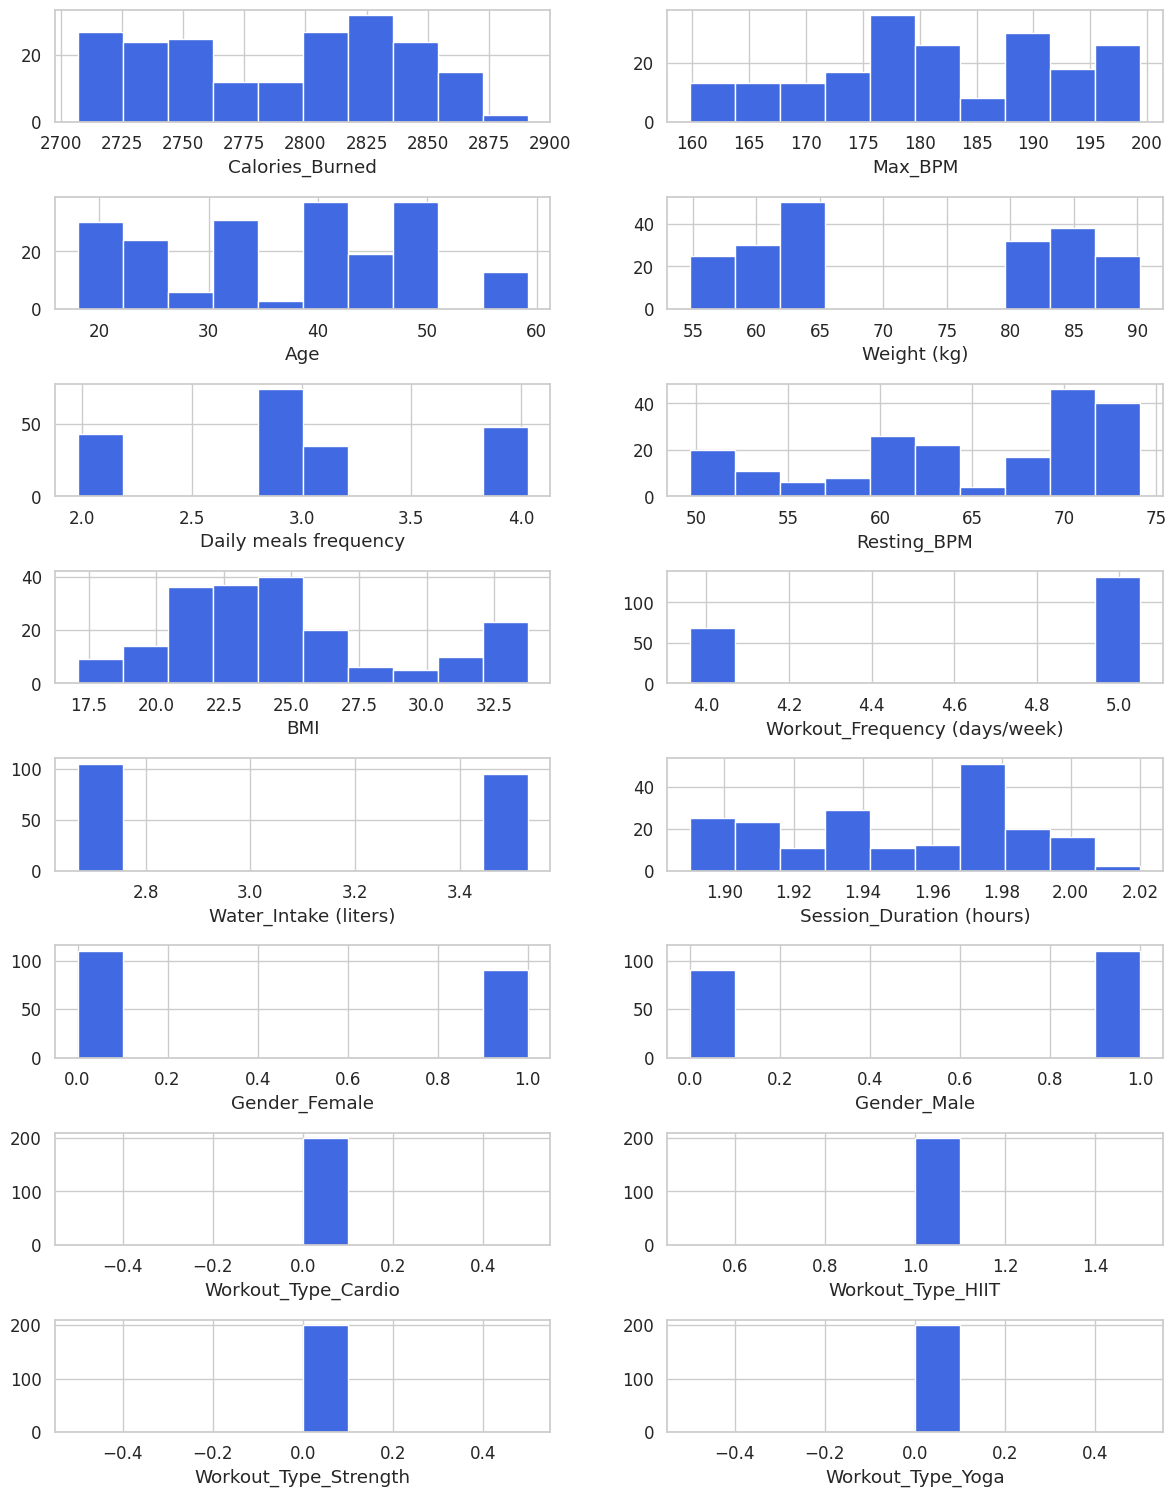

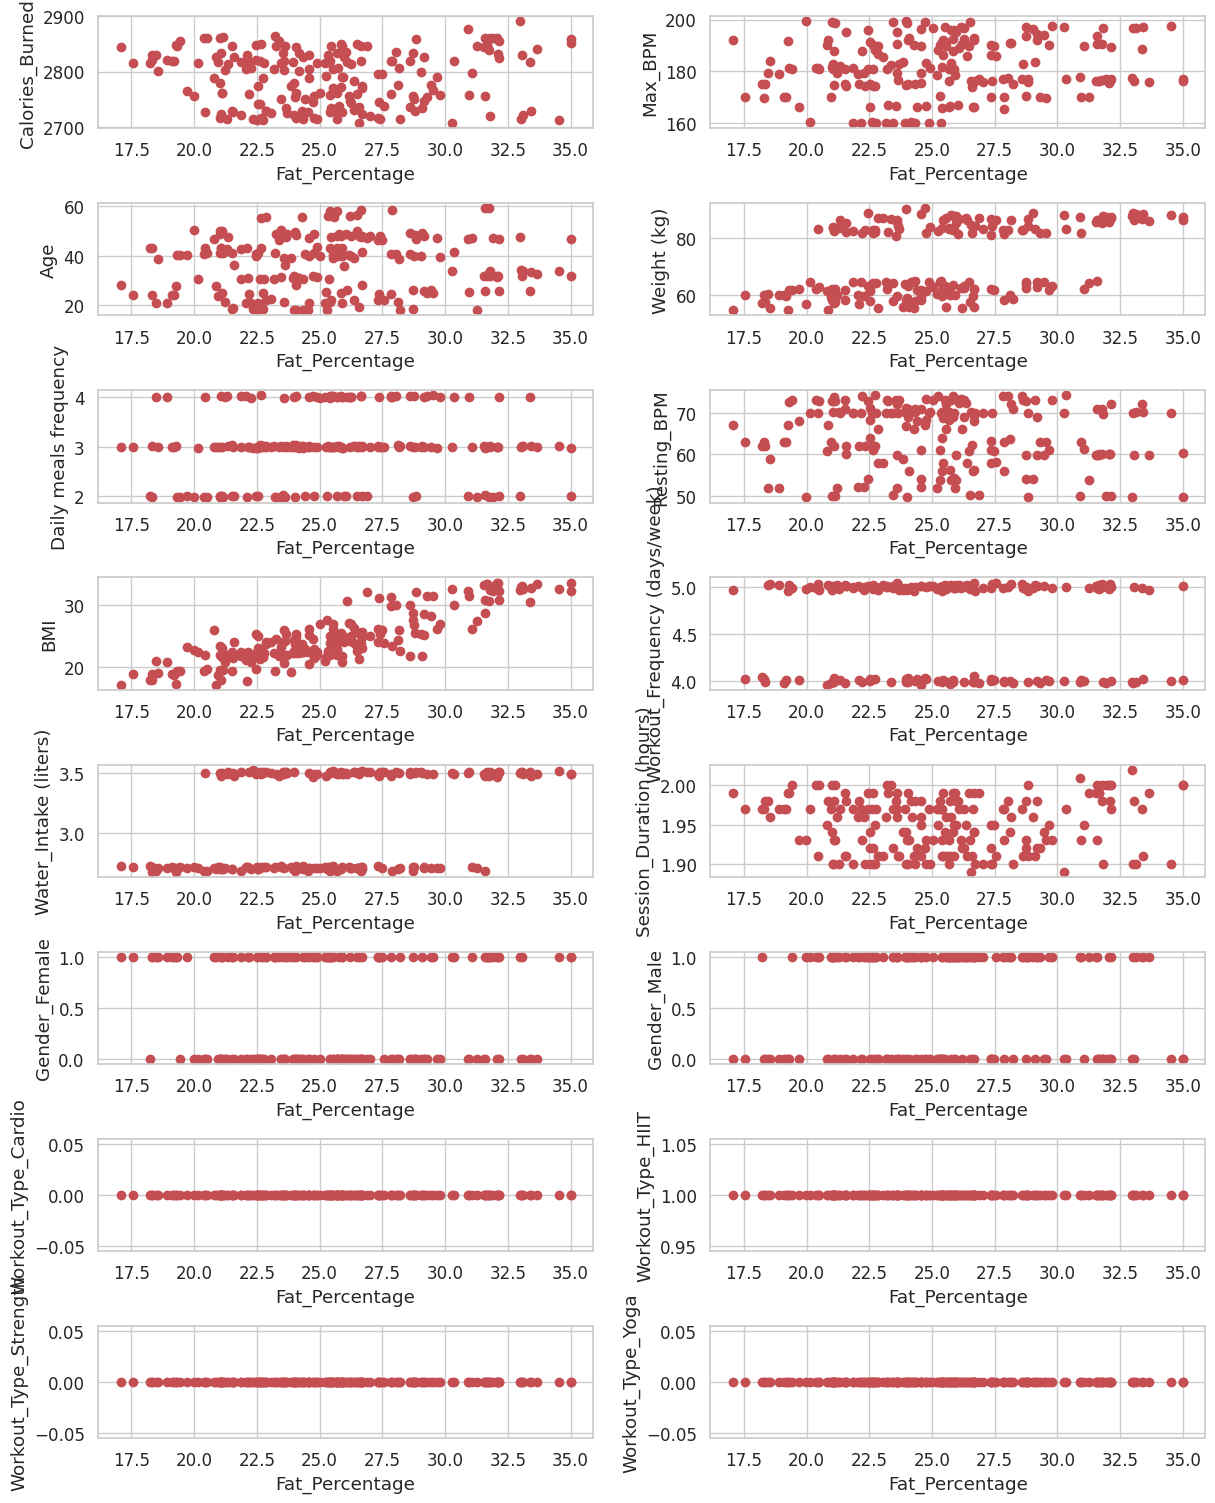

In [23]:
_, high = data_selected_features["Calories_Burned"].quantile([0.01, 0.99])
calories_outliers = data_important_features[data_important_features['Calories_Burned'] > high]
plot_pairplot(
    data=calories_outliers,
    target_col='Fat_Percentage',
    plot_type='hist',
    colour='royalblue')
plot_pairplot(
    data=calories_outliers,
    target_col='Fat_Percentage',
    plot_type='scatter',
    colour='r')

In [24]:
len(calories_outliers)

200

There are 200 records where `Calories_Burned` feature is too high. After visual analysis no erors is found. Those individual might be professional athletes or obese people, so I can simply keep them or use log to transform them.  

99th quantile for Weight 127.67


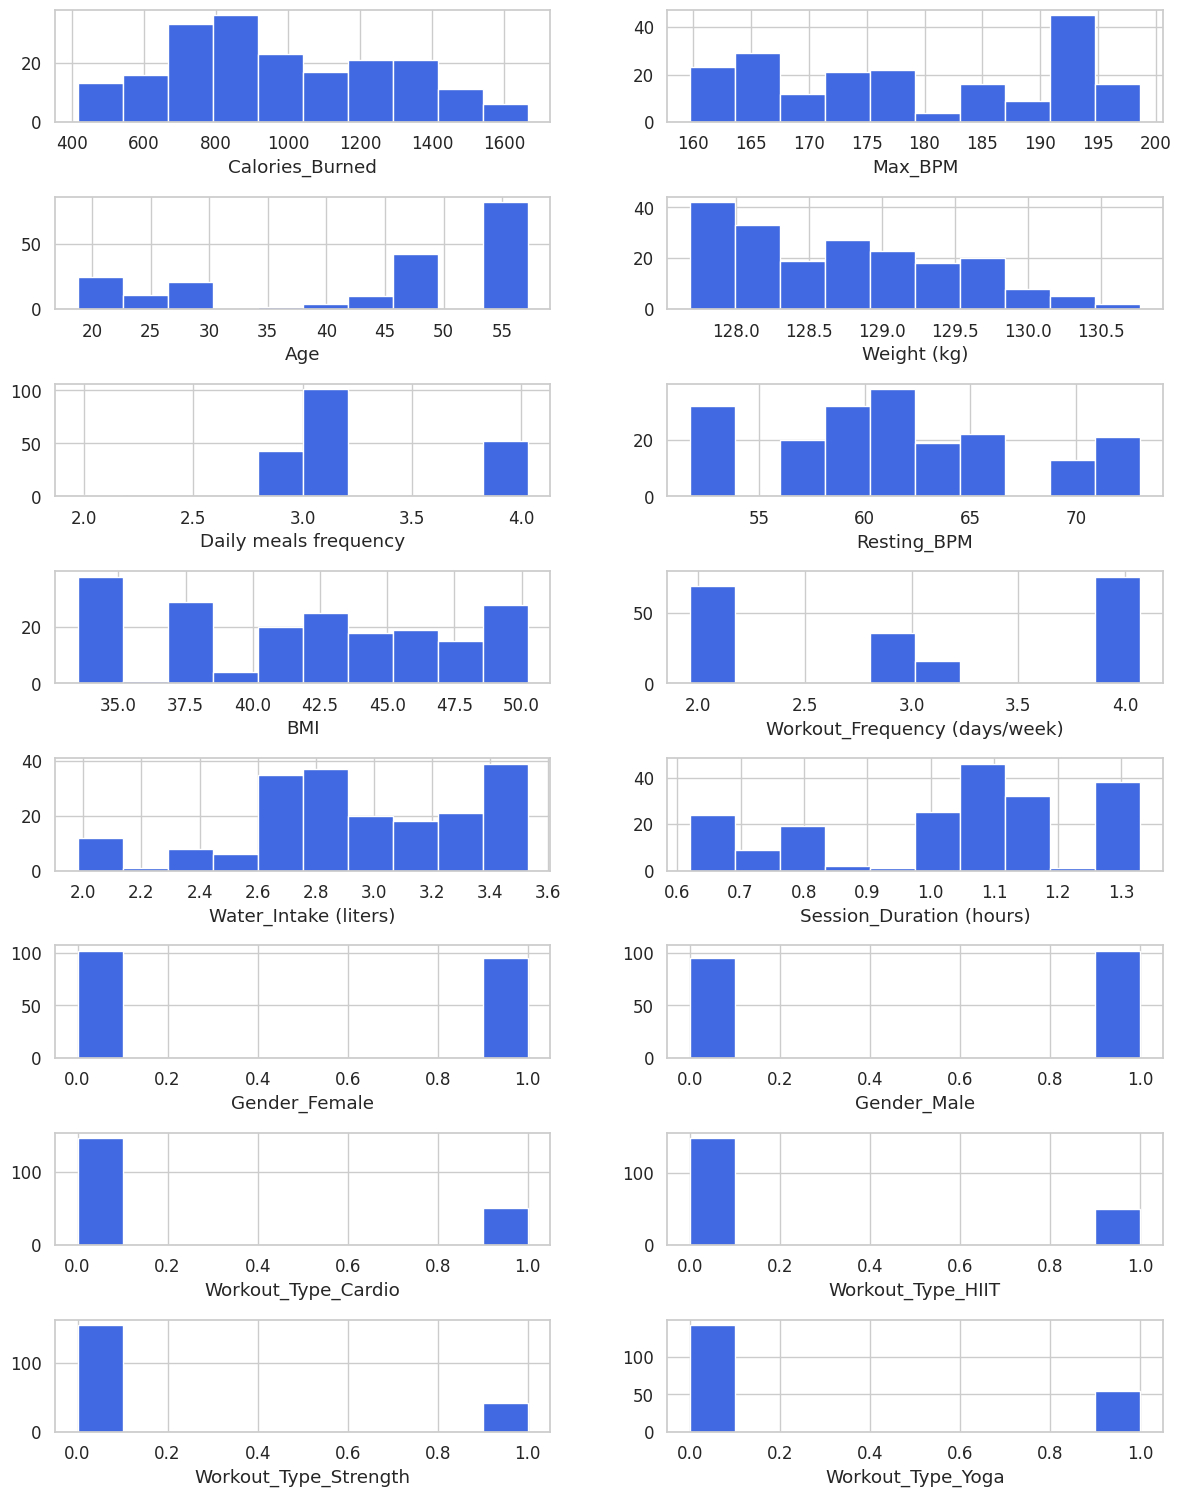

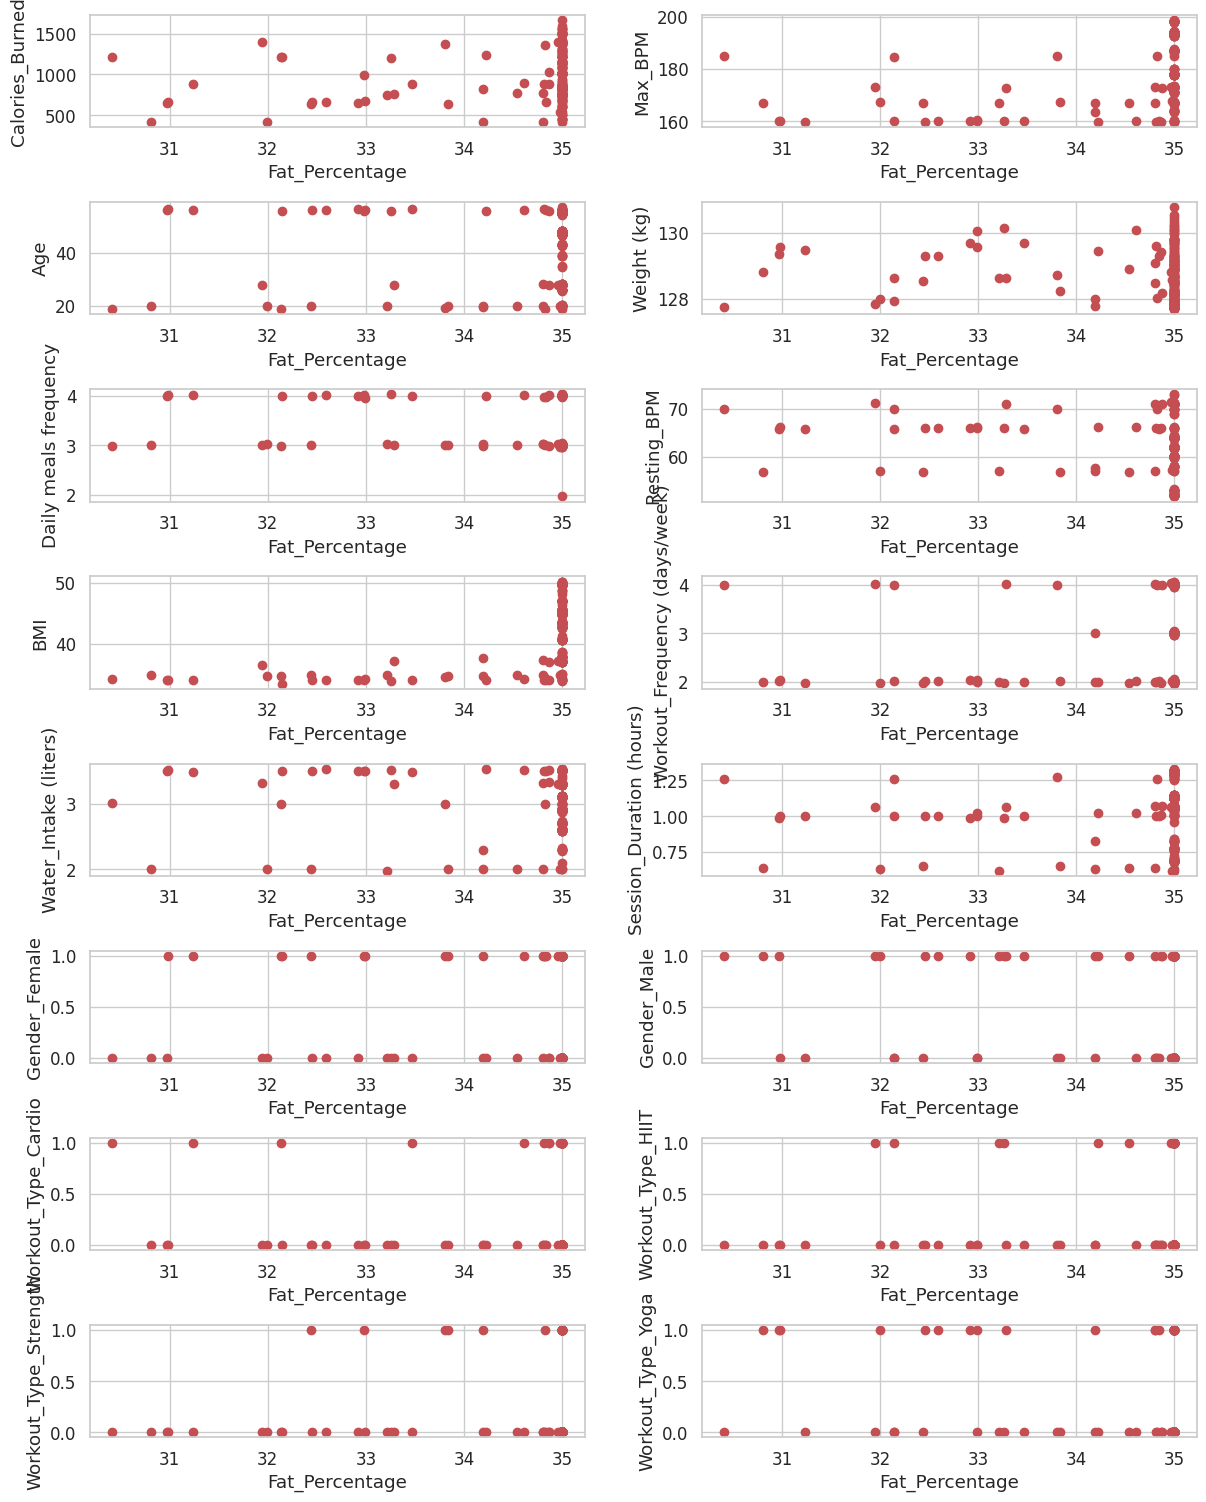

In [25]:
_, high = data_selected_features["Weight (kg)"].quantile([0.01, 0.99])
print('99th quantile for Weight', high)
weight_outliers = data_important_features[data_important_features['Weight (kg)'] > high]
plot_pairplot(
    data=weight_outliers,
    target_col='Fat_Percentage',
    plot_type='hist',
    colour='royalblue')
plot_pairplot(
    data=weight_outliers,
    target_col='Fat_Percentage',
    plot_type='scatter',
    colour='r')

In [26]:
len(weight_outliers)

197

197 records contain very high weight numbers. I do not count them as outliers because it is very important numbers. This dataset should definitely contain such values for weight as well as low numbers. I will keep them.

`BMI` feature is closely related to `Weight` feature, for that reason we have outliers in both of them. No changes needed.

### Feature Engineering

Now, I will use cutom function to generate custom features based on the given ones

In [27]:
def add_engineered_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Creates new engineered features for predicting Fat_Percentage.
    Assumes the columns listed by the user exist in df.
    """
    df = df.copy()

    eps = 1e-9  # to avoid division by zero

    # ---------- Core physiology / intensity proxies ----------
    # Heart-rate reserve (HRR) and intensity proxies
    df["HRR"] = df["Max_BPM"] - df["Resting_BPM"]
    df["HRR"] = df["HRR"].clip(lower=0)

    df["Intensity_Ratio"] = df["Resting_BPM"] / (df["Max_BPM"] + eps)  # ~ how "high" resting is relative to max
    df["HRR_per_Age"] = df["HRR"] / (df["Age"] + eps)

    # ---------- Training load / volume proxies ----------
    # Weekly training hours and a simple "weekly load" proxy
    df["Weekly_Training_Hours"] = df["Workout_Frequency (days/week)"] * df["Session_Duration (hours)"]
    df["Weekly_Training_Hours"] = df["Weekly_Training_Hours"].clip(lower=0)

    # Calories burned normalized by training time (burn rate)
    df["Calories_per_Training_Hour"] = df["Calories_Burned"] / (df["Weekly_Training_Hours"] + eps)

    # Calories burned normalized by body weight (useful across different sizes)
    df["Calories_per_kg"] = df["Calories_Burned"] / (df["Weight (kg)"] + eps)

    # ---------- Lifestyle proxies ----------
    # Hydration relative to weight
    df["Water_per_kg"] = df["Water_Intake (liters)"] / (df["Weight (kg)"] + eps)

    # Meals per day relative to calories (rough "calorie density per meal")
    df["Calories_per_Meal"] = df["Calories_Burned"] / (df["Daily meals frequency"] + eps)

    # BMI interactions
    df["BMI_x_Age"] = df["BMI"] * df["Age"]
    df["BMI_x_TrainingHours"] = df["BMI"] * df["Weekly_Training_Hours"]

    # ---------- Workout type composites ----------
    # Ensure one-hot columns exist; if not, create safely as 0
    for col in ["Workout_Type_Cardio", "Workout_Type_HIIT", "Workout_Type_Strength", "Workout_Type_Yoga",
                "Gender_Female", "Gender_Male"]:
        if col not in df.columns:
            df[col] = 0

    # "High-intensity" flag (Cardio or HIIT)
    df["High_Intensity_Workout"] = ((df["Workout_Type_Cardio"] == 1) | (df["Workout_Type_HIIT"] == 1)).astype(float)

    # Strength emphasis vs endurance emphasis
    df["Strength_vs_Cardio"] = df["Workout_Type_Strength"] - df["Workout_Type_Cardio"]

    # Intensity-weighted training hours
    # (HIIT gets highest weight, then Cardio/Strength, then Yoga)
    df["Intensity_Weighted_Training_Hours"] = df["Weekly_Training_Hours"] * (
        1.6 * df["Workout_Type_HIIT"] +
        1.2 * df["Workout_Type_Cardio"] +
        1.2 * df["Workout_Type_Strength"] +
        0.8 * df["Workout_Type_Yoga"]
    )

    # Calories burned adjusted by workout type intensity
    df["Type_Adjusted_Calories"] = df["Calories_Burned"] * (
        1.5 * df["Workout_Type_HIIT"] +
        1.2 * df["Workout_Type_Cardio"] +
        1.1 * df["Workout_Type_Strength"] +
        0.9 * df["Workout_Type_Yoga"]
    )

    # ---------- Interaction features (often strong for NNs) ----------
    df["Age_x_TrainingHours"] = df["Age"] * df["Weekly_Training_Hours"]
    df["HRR_x_TrainingHours"] = df["HRR"] * df["Weekly_Training_Hours"]
    df["BMI_x_CaloriesPerKg"] = df["BMI"] * df["Calories_per_kg"]

    # ---------- Optional: Log transforms (helps with skew) ----------
    for col in ["Calories_Burned", "Weekly_Training_Hours", "Calories_per_Training_Hour", "Calories_per_kg"]:
        df[f"log1p_{col}"] = np.log1p(df[col].clip(lower=0))

    return df


df_fe = add_engineered_features(data_important_features)
df_fe

,Fat_Percentage,Calories_Burned,Max_BPM,Age,Weight (kg),Daily meals frequency,Resting_BPM,BMI,Workout_Frequency (days/week),Water_Intake (liters),...,Strength_vs_Cardio,Intensity_Weighted_Training_Hours,Type_Adjusted_Calories,Age_x_TrainingHours,HRR_x_TrainingHours,BMI_x_CaloriesPerKg,log1p_Calories_Burned,log1p_Weekly_Training_Hours,log1p_Calories_per_Training_Hour,log1p_Calories_per_kg
0,26.800377,1080.90,188.58,34.91,65.27,2.99,69.05,24.87,3.99,1.50,...,1.0,4.78800,1188.990,139.290900,476.924700,411.858174,6.986474,1.607436,5.605443,2.865649
1,27.655021,1809.91,179.43,23.37,56.41,3.01,73.18,23.48,4.00,1.90,...,0.0,8.76800,2714.865,128.067600,582.250000,753.353781,7.501585,1.868721,5.802950,3.499077
2,24.320821,802.26,175.04,33.20,58.98,1.99,54.96,21.15,2.99,1.88,...,-1.0,3.26508,962.712,90.333880,326.725672,287.687335,6.688678,1.313966,5.689856,2.681175
3,32.813572,1450.79,191.21,38.69,93.78,3.00,50.07,32.45,3.99,2.50,...,0.0,7.02240,2176.185,169.810410,619.463460,502.006137,7.280553,1.684360,5.803783,2.801549
4,17.307319,1166.40,193.58,45.09,52.42,3.00,70.84,14.83,4.00,2.91,...,1.0,5.18400,1283.040,194.788800,530.236800,329.983060,7.062534,1.671473,5.602119,3.146350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,27.505498,761.61,199.20,46.77,98.31,3.03,63.72,27.23,3.02,2.99,...,1.0,2.79048,837.771,108.758958,315.045192,210.951483,6.636747,1.201590,5.794591,2.168714
19996,26.180562,2303.13,196.18,40.38,88.12,2.97,54.04,25.20,5.01,3.52,...,1.0,11.84364,2533.443,398.538486,1402.879158,658.634544,7.742458,2.385979,5.456831,3.300872
19997,23.331802,1468.80,163.34,50.31,46.20,3.00,61.65,16.57,4.02,2.81,...,1.0,6.56064,1615.680,275.054832,555.959568,526.796883,7.292882,1.866743,5.597150,3.490191
19998,18.985868,929.75,179.27,52.36,44.30,2.00,60.88,16.88,3.02,1.59,...,0.0,3.40656,836.775,222.959352,504.128298,354.270429,6.835991,1.659789,5.390639,3.090478


## Step #6 Normalizing data & train/test split

In [28]:
target_feature = df_fe.pop('Fat_Percentage')
df_fe.insert(0, 'Fat_Percentage', target_feature)
df_fe

,Fat_Percentage,Calories_Burned,Max_BPM,Age,Weight (kg),Daily meals frequency,Resting_BPM,BMI,Workout_Frequency (days/week),Water_Intake (liters),...,Strength_vs_Cardio,Intensity_Weighted_Training_Hours,Type_Adjusted_Calories,Age_x_TrainingHours,HRR_x_TrainingHours,BMI_x_CaloriesPerKg,log1p_Calories_Burned,log1p_Weekly_Training_Hours,log1p_Calories_per_Training_Hour,log1p_Calories_per_kg
0,26.800377,1080.90,188.58,34.91,65.27,2.99,69.05,24.87,3.99,1.50,...,1.0,4.78800,1188.990,139.290900,476.924700,411.858174,6.986474,1.607436,5.605443,2.865649
1,27.655021,1809.91,179.43,23.37,56.41,3.01,73.18,23.48,4.00,1.90,...,0.0,8.76800,2714.865,128.067600,582.250000,753.353781,7.501585,1.868721,5.802950,3.499077
2,24.320821,802.26,175.04,33.20,58.98,1.99,54.96,21.15,2.99,1.88,...,-1.0,3.26508,962.712,90.333880,326.725672,287.687335,6.688678,1.313966,5.689856,2.681175
3,32.813572,1450.79,191.21,38.69,93.78,3.00,50.07,32.45,3.99,2.50,...,0.0,7.02240,2176.185,169.810410,619.463460,502.006137,7.280553,1.684360,5.803783,2.801549
4,17.307319,1166.40,193.58,45.09,52.42,3.00,70.84,14.83,4.00,2.91,...,1.0,5.18400,1283.040,194.788800,530.236800,329.983060,7.062534,1.671473,5.602119,3.146350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,27.505498,761.61,199.20,46.77,98.31,3.03,63.72,27.23,3.02,2.99,...,1.0,2.79048,837.771,108.758958,315.045192,210.951483,6.636747,1.201590,5.794591,2.168714
19996,26.180562,2303.13,196.18,40.38,88.12,2.97,54.04,25.20,5.01,3.52,...,1.0,11.84364,2533.443,398.538486,1402.879158,658.634544,7.742458,2.385979,5.456831,3.300872
19997,23.331802,1468.80,163.34,50.31,46.20,3.00,61.65,16.57,4.02,2.81,...,1.0,6.56064,1615.680,275.054832,555.959568,526.796883,7.292882,1.866743,5.597150,3.490191
19998,18.985868,929.75,179.27,52.36,44.30,2.00,60.88,16.88,3.02,1.59,...,0.0,3.40656,836.775,222.959352,504.128298,354.270429,6.835991,1.659789,5.390639,3.090478


### Transforming Data

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_fe_transformed = scaler.fit_transform(df_fe)
df_fe_transformed[1]

array([0.68965139, 0.57903735, 0.49888421, 0.12886969, 0.18812097,
       0.50717703, 0.94722111, 0.29955486, 0.66025641, 0.1938326 ,
       0.5751634 , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.32393269, 0.73654546, 0.46035624,
       0.49369308, 0.37688391, 0.59705624, 0.2780726 , 0.38142897,
       0.10214583, 0.34647844, 1.        , 0.5       , 0.5215436 ,
       0.59921081, 0.18935445, 0.35725465, 0.57779182, 0.78613475,
       0.68822541, 0.54574712, 0.82368755])

### Train/Test Split

In [30]:
X, y = df_fe_transformed[:, 1:], df_fe_transformed[:, 1]
X.shape, y.shape

((20000, 37), (20000,))

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000, 37), (4000, 37), (16000,), (4000,))

__Reusable functions for evaluating__

In [32]:
# function to inverse transform scalled data and combine it with predicted values
def inverse_data_combine_predicitons(scaler, X, y_true, y_pred, feature_names):
  combined_orig = np.concatenate([y_true.reshape(-1, 1), X], axis=1)
  inverse_transformed_orig = scaler.inverse_transform(combined_orig)

  combined_predicted = np.concatenate([y_pred.reshape(-1, 1), X], axis=1)
  inverse_transformed_pred = scaler.inverse_transform(combined_predicted)

  df = pd.DataFrame(inverse_transformed_orig, columns=feature_names)
  df['Predicted'] = inverse_transformed_pred[:, 0]
  return df

# function to plot the actual data points and our predictions
def plot_predictions(x_axis, y_true, y_pred, title, x_label, y_label):
  plt.figure(figsize=(8, 8))
  plt.scatter(x_axis, y_true, label='True', c='b')
  plt.scatter(x_axis, y_pred, label='Pred', c='r')
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.show()

## Step #7 Model Fitting & Evaluating

Now, It's time to create a simple model and see how it performs on our data

### Model Creation

In [33]:
from statsmodels.base.model import Optimizer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(37,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='softplus'),
    tf.keras.layers.Dense(1)
])

model.summary()

model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mse']
)

loss_history = model.fit(
    X_train,
    y_train,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,441 (21.25 KB)

 Trainable params: 5,441 (21.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0332 - mse: 0.0332
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0049 - mse: 0.0049
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0036 - mse: 0.0036
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0028 - mse: 0.0028
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0023 - mse: 0.0023
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019 - mse: 0.0019
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0017 - mse: 0.0017
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012 - mse: 0.0012
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011 - mse: 0.0011


In [34]:
y_pred = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


### Evaluation

In [35]:
feature_names = df_fe.columns

df_fe_inversed = inverse_data_combine_predicitons(
    scaler=scaler,
    X=X_test,
    y_true=y_test,
    y_pred=y_pred,
    feature_names=feature_names
)

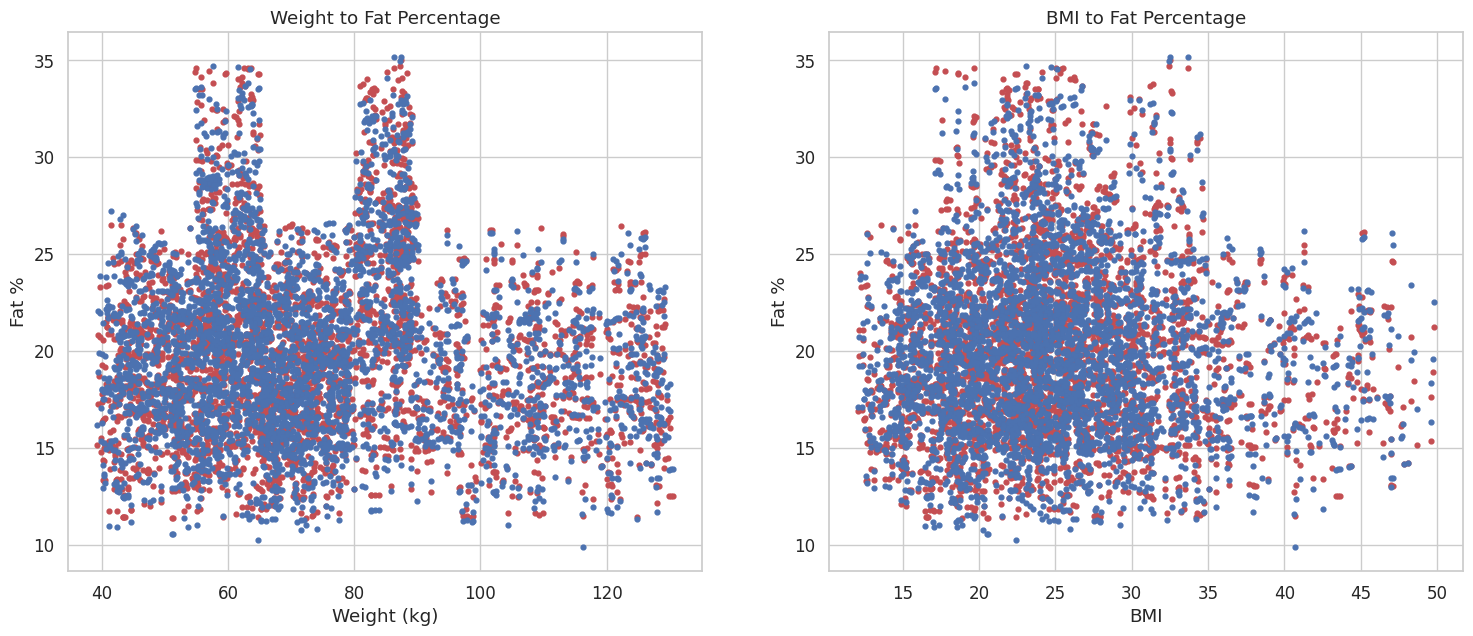

In [36]:
plot_weight_bmi_to_fat(df_fe_inversed, with_predicted=True, size=12)

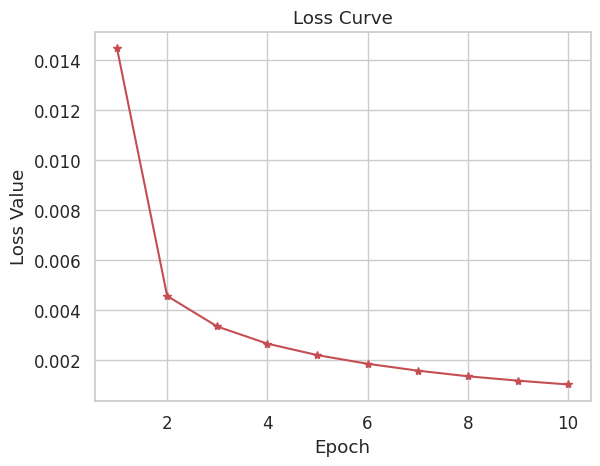

In [37]:
epochs = np.arange(1, 11)
plt.plot(epochs, loss_history.history['loss'], '-*r')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.show()

Even with default parameters, model perfoms really well, loss on the 10th epochs is: `0.00093`. Predictions on the testing data are very close to the actual data. Loss curve still can go down.

## Step #9 Improving the Model

__Let's add 1 more dense layer and increase number of epochs__

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(37,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='softplus'),
    tf.keras.layers.Dense(1)
])

model.summary()

model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mse']
)

loss_history = model.fit(
    X_train,
    y_train,
    epochs=20
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,601 (37.50 KB)

 Trainable params: 9,601 (37.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0754 - mse: 0.0754
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0199 - mse: 0.0199
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0059 - mse: 0.0059
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0035 - mse: 0.0035
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0028 - mse: 0.0028
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0022 - mse: 0.0022
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019 - mse: 0.0019
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012 - mse: 0.0012
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0010 - mse: 0.0010
Epoch 12/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.5098e-04 - mse: 9.5098e-04
Epoch 13/20
500/5

In [43]:
model.evaluate(X_test, y_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.8764e-04 - mse: 4.8764e-04


[0.0004816063155885786, 0.0004816063155885786]

In [39]:
feature_names = df_fe.columns

df_fe_inversed = inverse_data_combine_predicitons(
    scaler=scaler,
    X=X_test,
    y_true=y_test,
    y_pred=y_pred,
    feature_names=feature_names
)

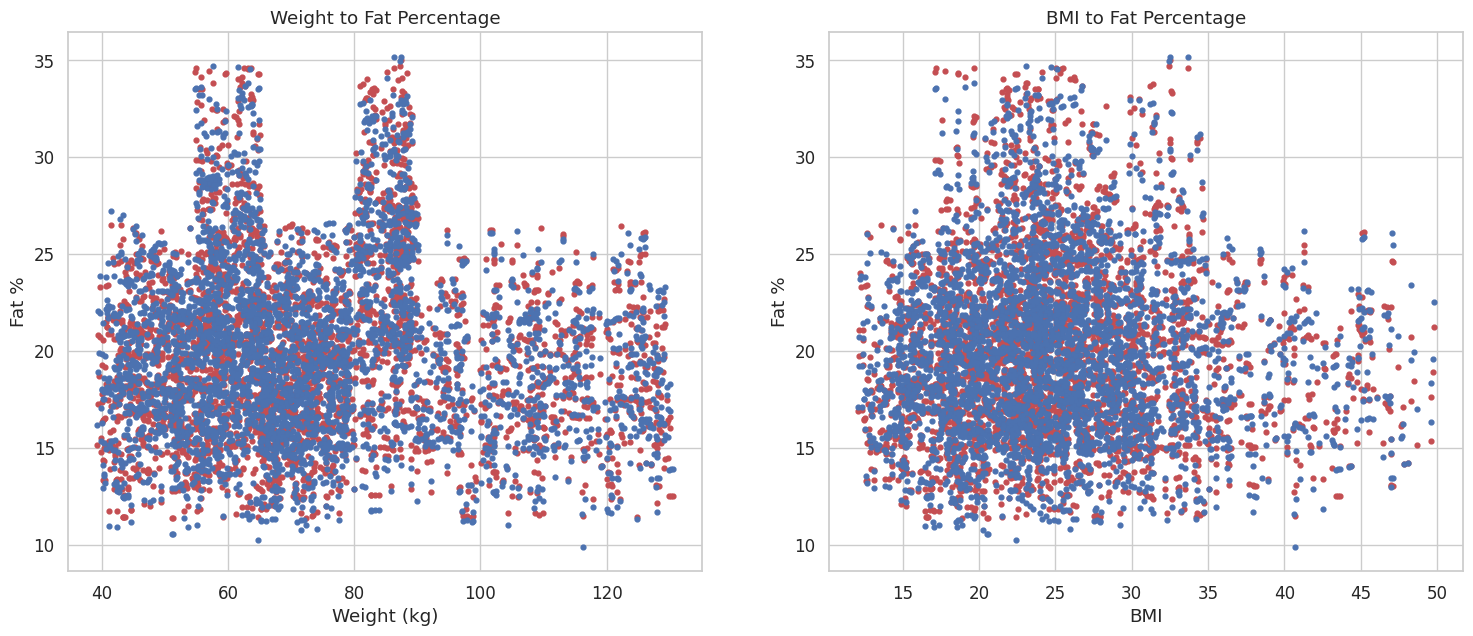

In [40]:
plot_weight_bmi_to_fat(df_fe_inversed, with_predicted=True, size=12)

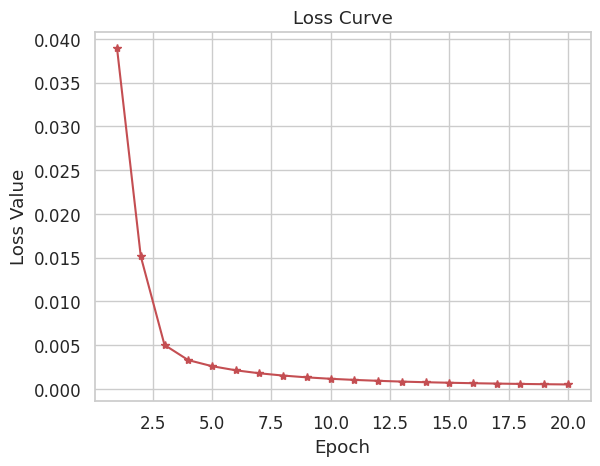

In [42]:
epochs = np.arange(1, 21)
plt.plot(epochs, loss_history.history['loss'], '-*r')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.show()

## Step #10 Saving the model

In [47]:
import pickle

with open('trained_model', 'wb') as f:
  pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

with open('trained_model', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    loaded_model = pickle.load(f)

loaded_model.evaluate(X_test, y_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8764e-04 - mse: 4.8764e-04


[0.0004816063155885786, 0.0004816063155885786]